# **Task : 1**

### Analyzing sales performance

In [ ]:
import pandas as pd
df = pd.read_excel("walmart_sales.xlsx")

# City Level
city_performance = df.groupby('City').agg({'Quantity': 'sum', 'Unit price': 'sum'})
city_performance['Revenue'] = city_performance['Quantity'] * city_performance['Unit price']
print("Performance at city level:")
print(city_performance)

# Branch Level
branch_performance = df.groupby('Branch').agg({'Quantity': 'sum', 'Unit price': 'sum'})
branch_performance['Revenue'] = branch_performance['Quantity'] * branch_performance['Unit price']
print("\nPerformance at branch level:")
print(branch_performance)


Performance at city level:
           Quantity  Unit price      Revenue
City                                        
Mandalay       1820    18478.88  33631561.60
Naypyitaw      1831    18567.76  33997568.56
Yangon         1859    18625.49  34624785.91

Performance at branch level:
        Quantity  Unit price      Revenue
Branch                                   
A           1883    18645.54  35109551.82
B           1899    19251.62  36558826.38
C           1728    17774.97  30715148.16


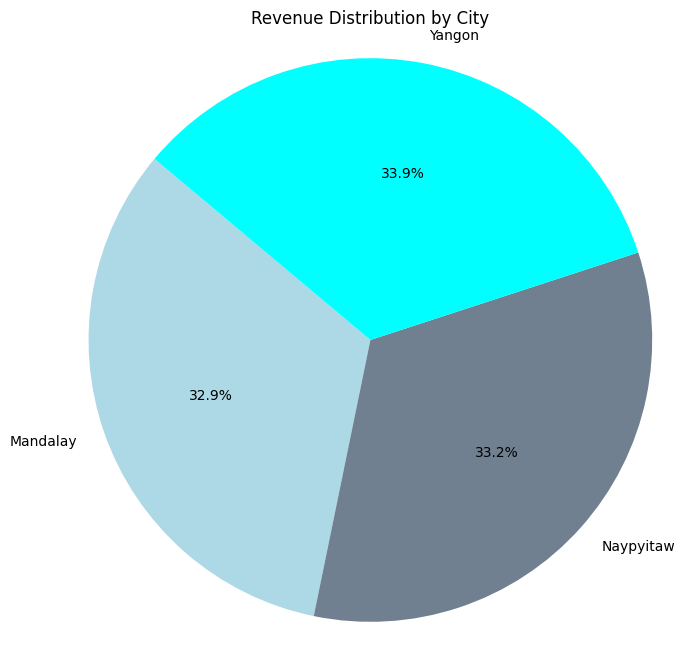

In [ ]:
# Performance at city level -> Plot
plt.figure(figsize=(8, 8))
plt.pie(city_performance['Revenue'], labels=city_performance.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'slategrey', 'cyan'])
plt.title('Revenue Distribution by City')
plt.axis('equal')
plt.show()


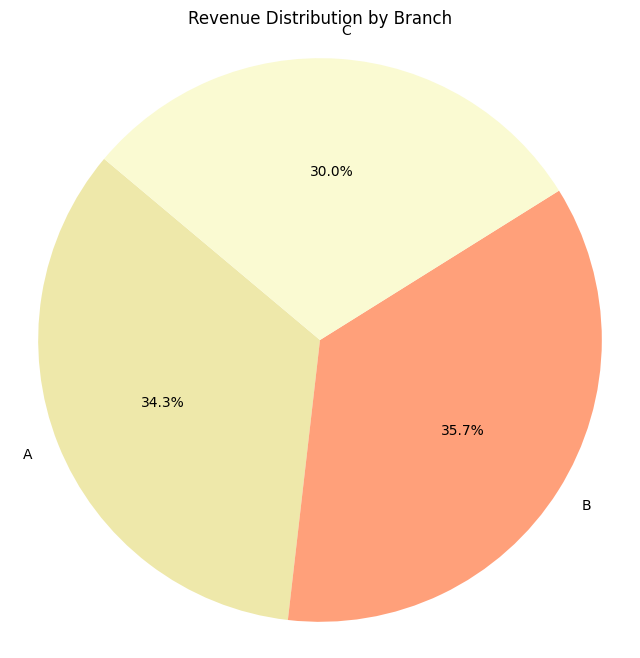

In [ ]:
# # Performance at branch level -> Plot
plt.figure(figsize=(8, 8))
plt.pie(branch_performance['Revenue'], labels=branch_performance.index, autopct='%1.1f%%', startangle=140, colors=['PaleGoldenrod', 'lightsalmon', 'LightGoldenrodYellow'])
plt.title('Revenue Distribution by Branch')
plt.axis('equal')
plt.show()

# **Task : 2**

### Average price at each branch of the city

In [ ]:
import pandas as pd
df = pd.read_excel("walmart_sales.xlsx")

# Average price
average_price_per_branch = df.groupby(['City', 'Branch'])['Unit price'].mean()

print("Average price of an item sold at each branch of the city:")
print(average_price_per_branch)


Average price of an item sold at each branch of the city:
City       Branch
Mandalay   A         53.353866
           B         56.133305
           C         57.958316
Naypyitaw  A         54.123182
           B         57.785688
           C         57.941009
Yangon     A         55.639298
           B         56.011062
           C         52.684602
Name: Unit price, dtype: float64


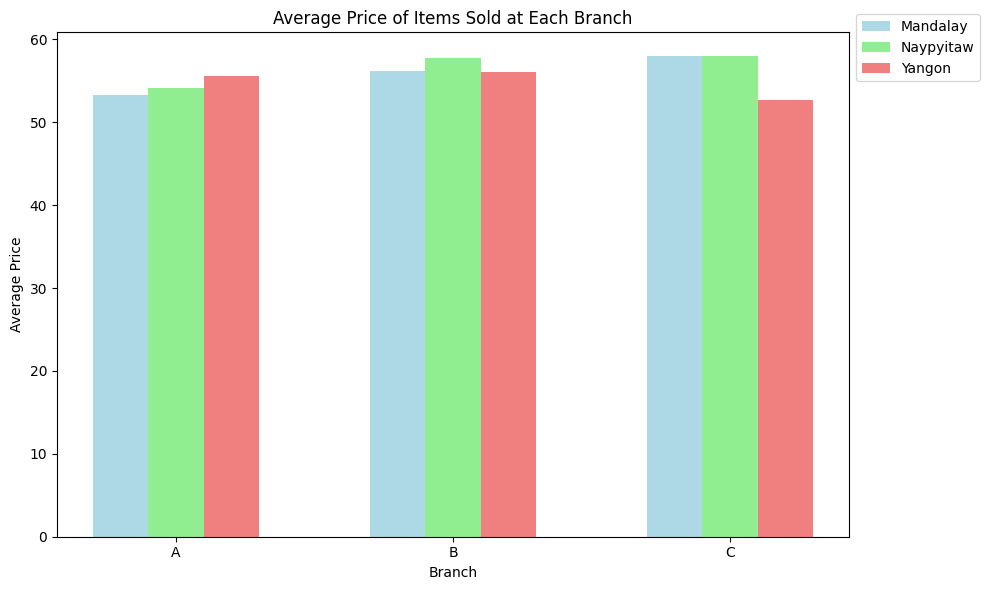

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

city_colors = {'Mandalay': 'lightblue', 'Naypyitaw': 'lightgreen', 'Yangon': 'lightcoral'}

branches = average_price_per_branch['Branch'].unique()
cities = average_price_per_branch['City'].unique()

bar_width = 0.2

r1 = np.arange(len(branches))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Average price/branch
plt.figure(figsize=(10, 6))
for i, city in enumerate(cities):
    plt.bar(r1 + i * bar_width, average_price_per_branch[average_price_per_branch['City'] == city]['Unit price'], width=bar_width, label=city, color=city_colors[city])

plt.xlabel('Branch')
plt.ylabel('Average Price')
plt.title('Average Price of Items Sold at Each Branch')
plt.xticks([r + bar_width for r in range(len(branches))], branches)
plt.legend(bbox_to_anchor=(1, 1.05))
plt.tight_layout()
plt.show()

# **Task : 3**

### Analyzing Sales Performance

#### **January**


*   Sales
*   Revenue
*   Gender
*   Payment Method



<ipython-input-35-756d9a072509>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_line_data.index, y='Quantity', data=product_line_data, palette='pastel')
<ipython-input-35-756d9a072509>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_line_data.index, y='Revenue', data=product_line_data, palette='pastel')
<ipython-input-35-756d9a072509>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_data.index, y='Quantity', data=payment_data, palette='pastel')


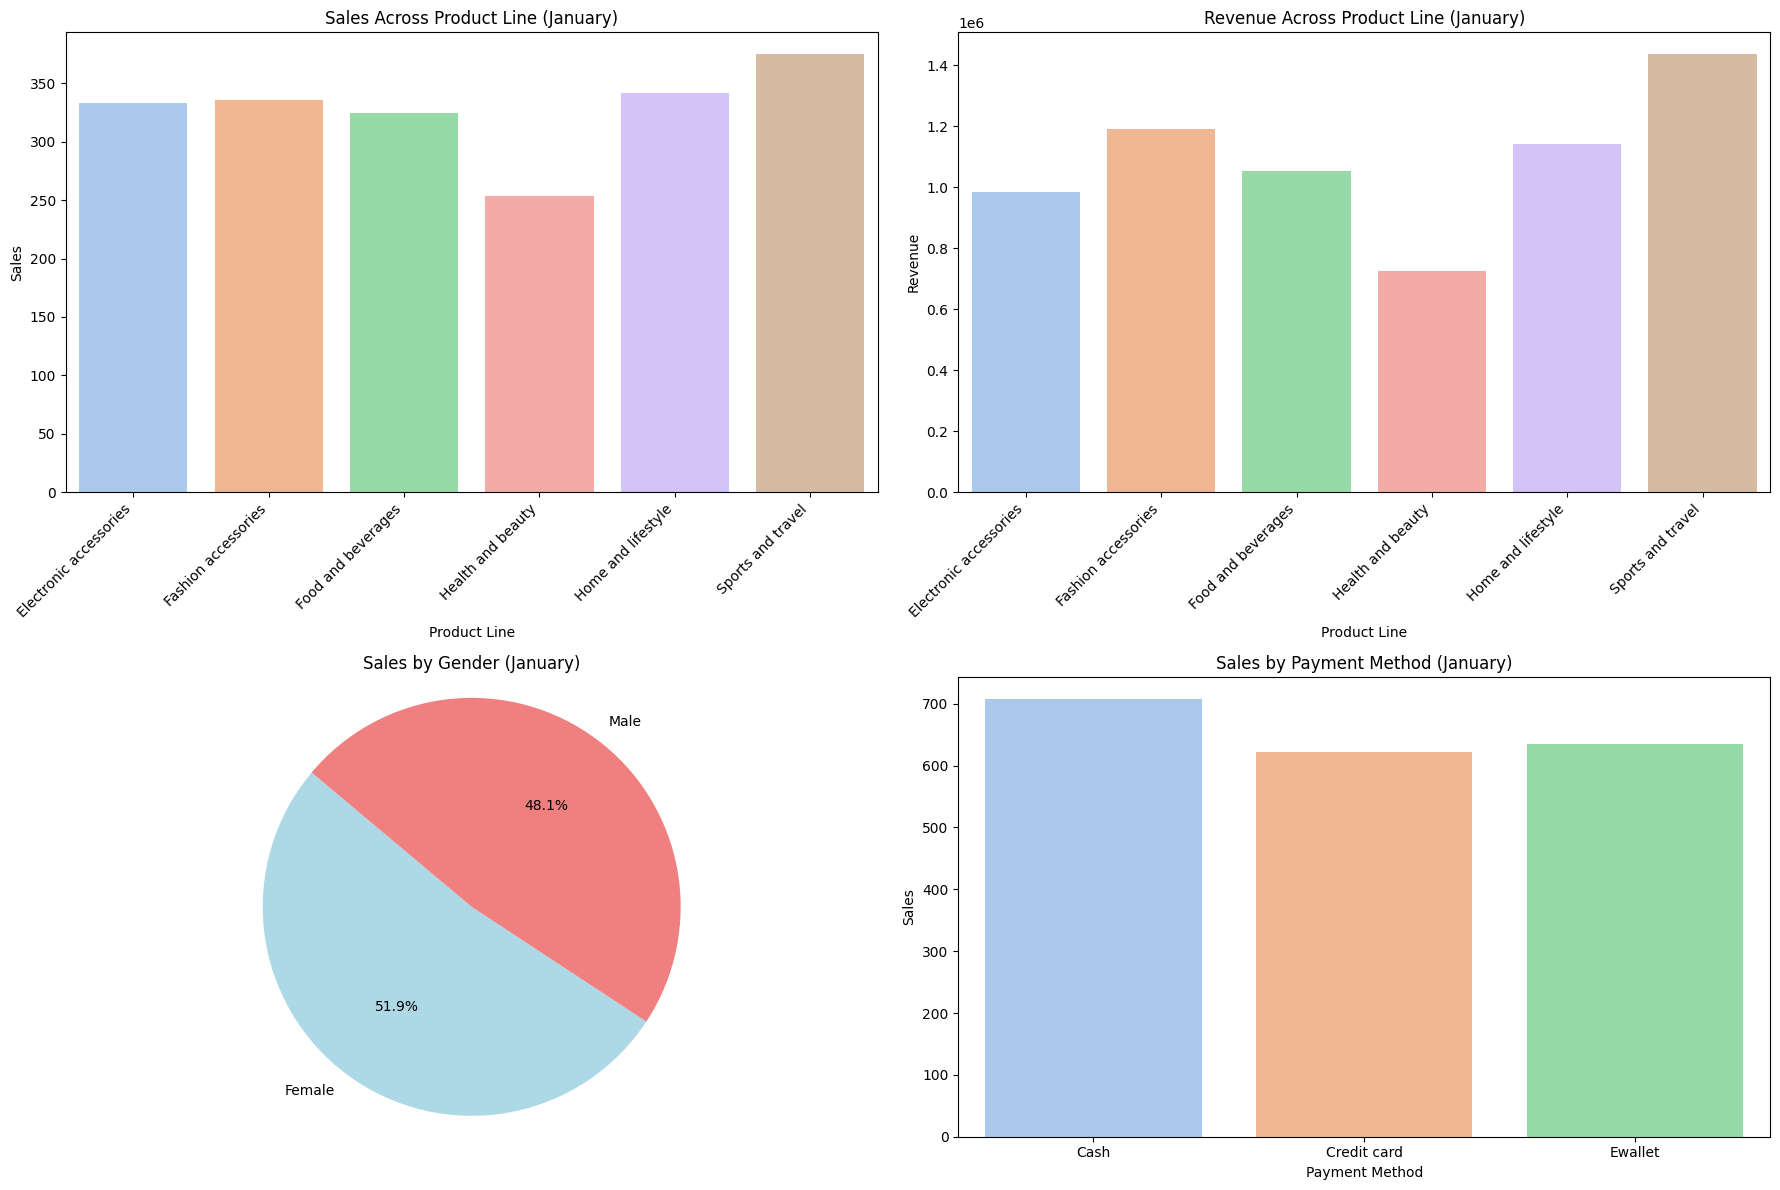

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
january_data = df[df['Month'] == 1] #January

product_line_data = january_data.groupby('Product line').agg({'Quantity': 'sum', 'Unit price': 'sum'})
product_line_data['Revenue'] = product_line_data['Quantity'] * product_line_data['Unit price']

gender_data = january_data.groupby('Gender').agg({'Quantity': 'sum', 'Unit price': 'sum'})
gender_data['Revenue'] = gender_data['Quantity'] * gender_data['Unit price']

payment_data = january_data.groupby('Payment').agg({'Quantity': 'sum', 'Unit price': 'sum'})
payment_data['Revenue'] = payment_data['Quantity'] * payment_data['Unit price']

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.barplot(x=product_line_data.index, y='Quantity', data=product_line_data, palette='pastel')
plt.title('Sales Across Product Line (January)')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 2)
sns.barplot(x=product_line_data.index, y='Revenue', data=product_line_data, palette='pastel')
plt.title('Revenue Across Product Line (January)')
plt.xlabel('Product Line')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 3)
plt.pie(gender_data['Quantity'], labels=gender_data.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Sales by Gender (January)')
plt.axis('equal')

plt.subplot(2, 2, 4)
sns.barplot(x=payment_data.index, y='Quantity', data=payment_data, palette='pastel')
plt.title('Sales by Payment Method (January)')
plt.xlabel('Payment Method')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

#### **February**


*   Sales
*   Revenue
*   Gender
*   Payment Method

<ipython-input-37-977d453498f4>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_line_data.index, y='Quantity', data=product_line_data, palette='pastel')
<ipython-input-37-977d453498f4>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_line_data.index, y='Revenue', data=product_line_data, palette='pastel')
<ipython-input-37-977d453498f4>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_data.index, y='Quantity', data=payment_data, palette='pastel')


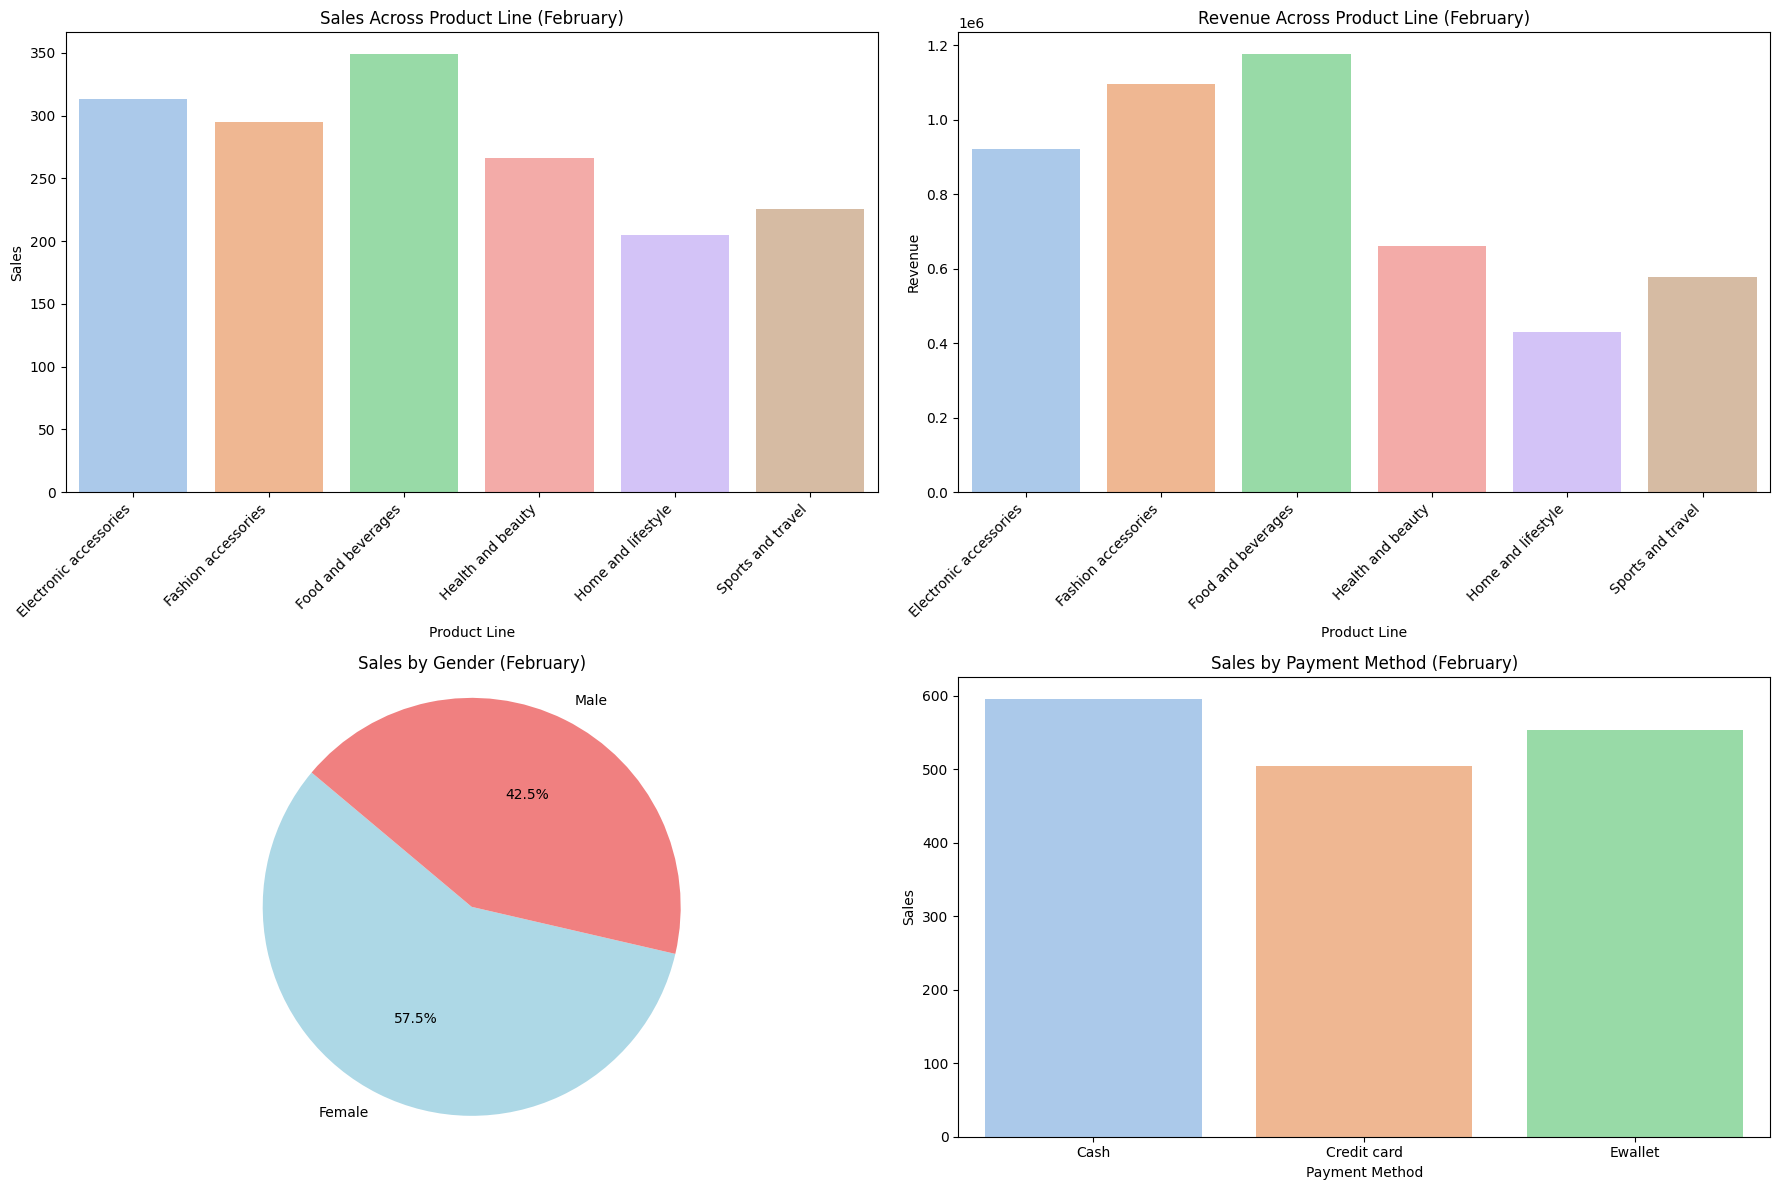

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
february_data = df[df['Month'] == 2] # February

product_line_data = february_data.groupby('Product line').agg({'Quantity': 'sum', 'Unit price': 'sum'})
product_line_data['Revenue'] = product_line_data['Quantity'] * product_line_data['Unit price']

gender_data = february_data.groupby('Gender').agg({'Quantity': 'sum', 'Unit price': 'sum'})
gender_data['Revenue'] = gender_data['Quantity'] * gender_data['Unit price']

payment_data = february_data.groupby('Payment').agg({'Quantity': 'sum', 'Unit price': 'sum'})
payment_data['Revenue'] = payment_data['Quantity'] * payment_data['Unit price']

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.barplot(x=product_line_data.index, y='Quantity', data=product_line_data, palette='pastel')
plt.title('Sales Across Product Line (February)')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 2)
sns.barplot(x=product_line_data.index, y='Revenue', data=product_line_data, palette='pastel')
plt.title('Revenue Across Product Line (February)')
plt.xlabel('Product Line')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 3)
plt.pie(gender_data['Quantity'], labels=gender_data.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Sales by Gender (February)')
plt.axis('equal')

plt.subplot(2, 2, 4)
sns.barplot(x=payment_data.index, y='Quantity', data=payment_data, palette='pastel')
plt.title('Sales by Payment Method (February)')
plt.xlabel('Payment Method')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

#### **March**


*   Sales
*   Revenue
*   Gender
*   Payment Method



<ipython-input-38-89d59ed79b16>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_line_data.index, y='Quantity', data=product_line_data, palette='pastel')
<ipython-input-38-89d59ed79b16>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_line_data.index, y='Revenue', data=product_line_data, palette='pastel')
<ipython-input-38-89d59ed79b16>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_data.index, y='Quantity', data=payment_data, palette='pastel')


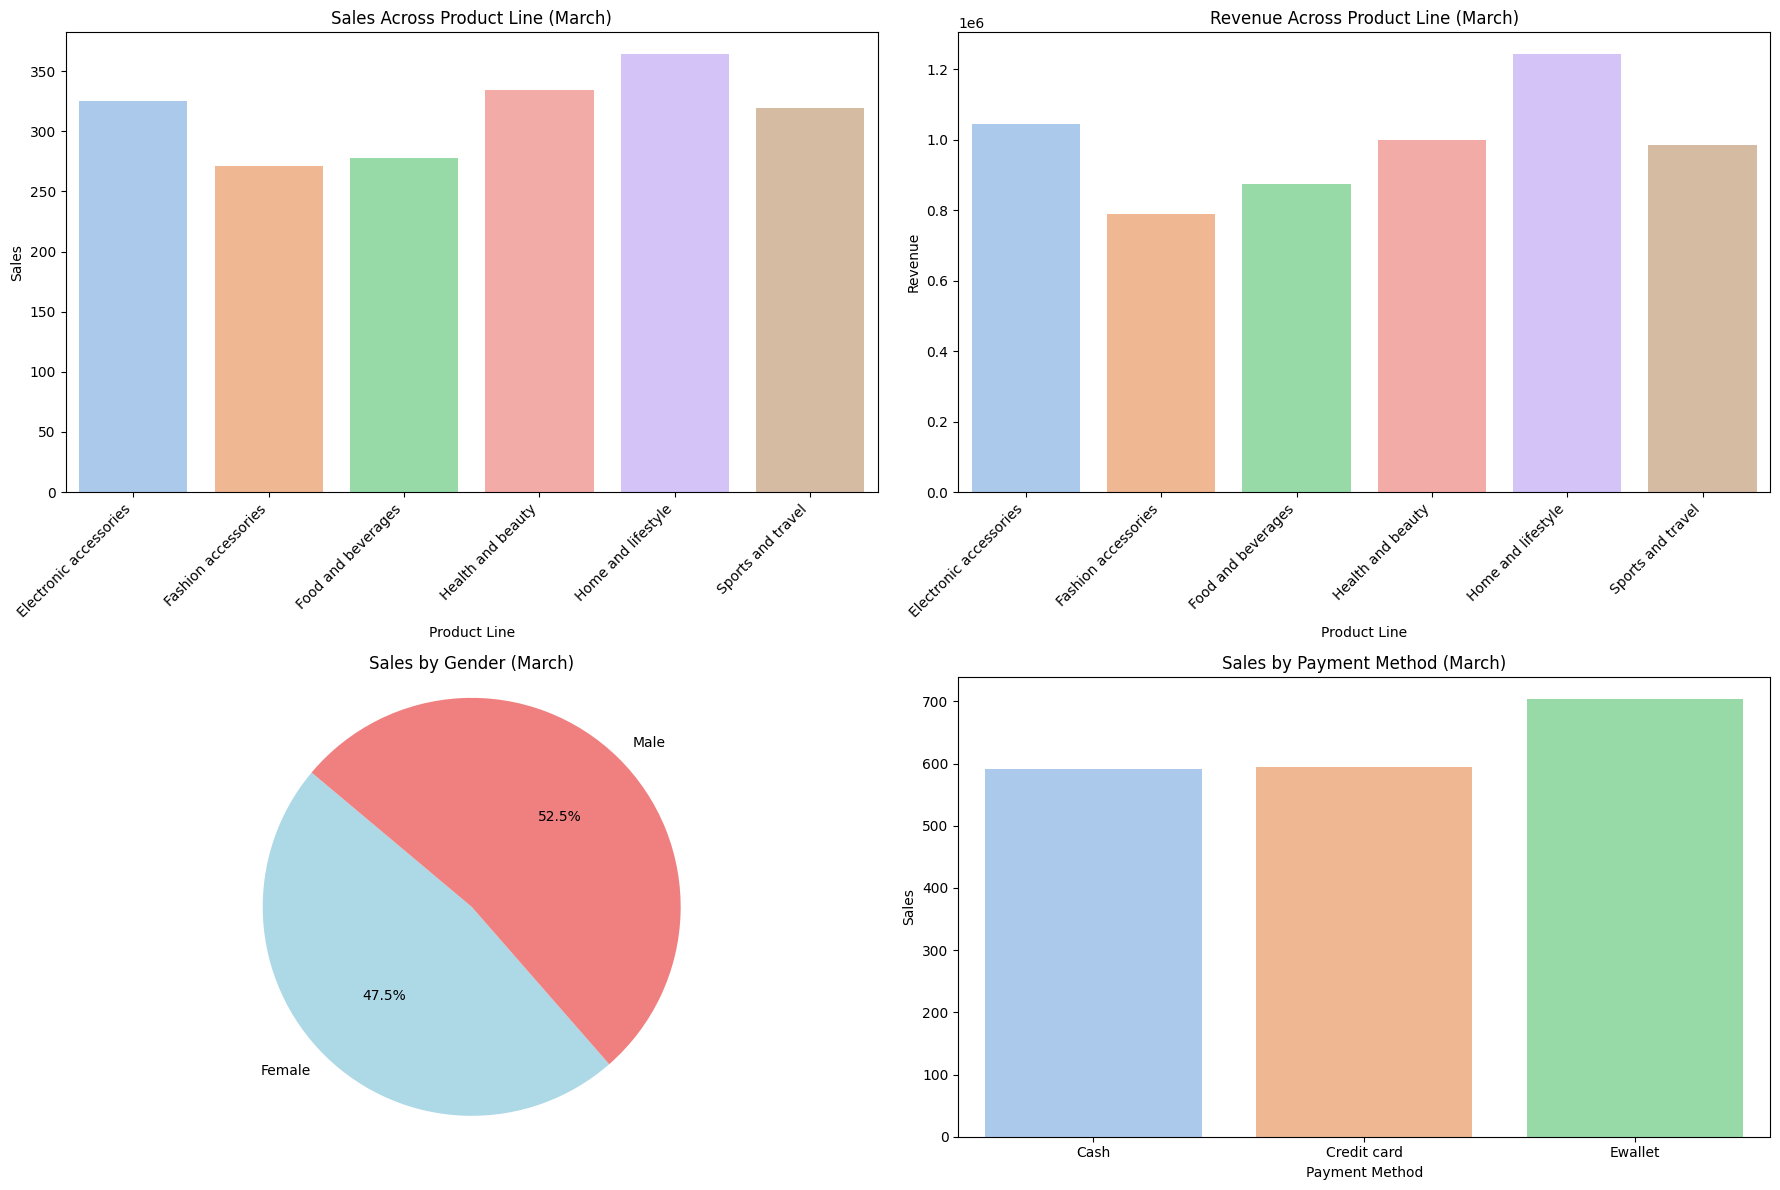

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
march_data = df[df['Month'] == 3] #March

product_line_data = march_data.groupby('Product line').agg({'Quantity': 'sum', 'Unit price': 'sum'})
product_line_data['Revenue'] = product_line_data['Quantity'] * product_line_data['Unit price']


gender_data = march_data.groupby('Gender').agg({'Quantity': 'sum', 'Unit price': 'sum'})
gender_data['Revenue'] = gender_data['Quantity'] * gender_data['Unit price']
payment_data = march_data.groupby('Payment').agg({'Quantity': 'sum', 'Unit price': 'sum'})
payment_data['Revenue'] = payment_data['Quantity'] * payment_data['Unit price']

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.barplot(x=product_line_data.index, y='Quantity', data=product_line_data, palette='pastel')
plt.title('Sales Across Product Line (March)')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 2)
sns.barplot(x=product_line_data.index, y='Revenue', data=product_line_data, palette='pastel')
plt.title('Revenue Across Product Line (March)')
plt.xlabel('Product Line')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 3)
plt.pie(gender_data['Quantity'], labels=gender_data.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Sales by Gender (March)')
plt.axis('equal')

plt.subplot(2, 2, 4)
sns.barplot(x=payment_data.index, y='Quantity', data=payment_data, palette='pastel')
plt.title('Sales by Payment Method (March)')
plt.xlabel('Payment Method')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

**Comparing Sales for each Month with respect to product Line**

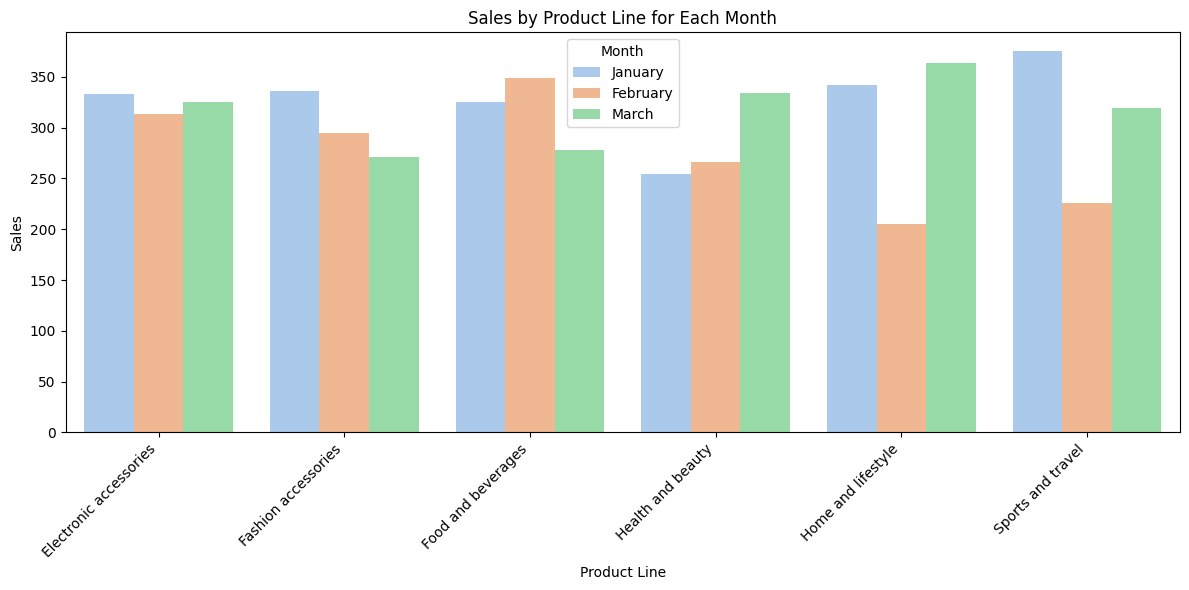

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()

product_line_month_data = df.groupby(['Product line', 'Month']).agg({'Quantity': 'sum'}).reset_index()

month_order = ['January', 'February', 'March'] # Reorder
product_line_month_data['Month'] = pd.Categorical(product_line_month_data['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(12, 6))

sns.barplot(data=product_line_month_data, x='Product line', y='Quantity', hue='Month', palette='pastel')
plt.title('Sales by Product Line for Each Month')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Month')
plt.tight_layout()
plt.show()

**Comparing Revenue for each Month with respect to Product lne**

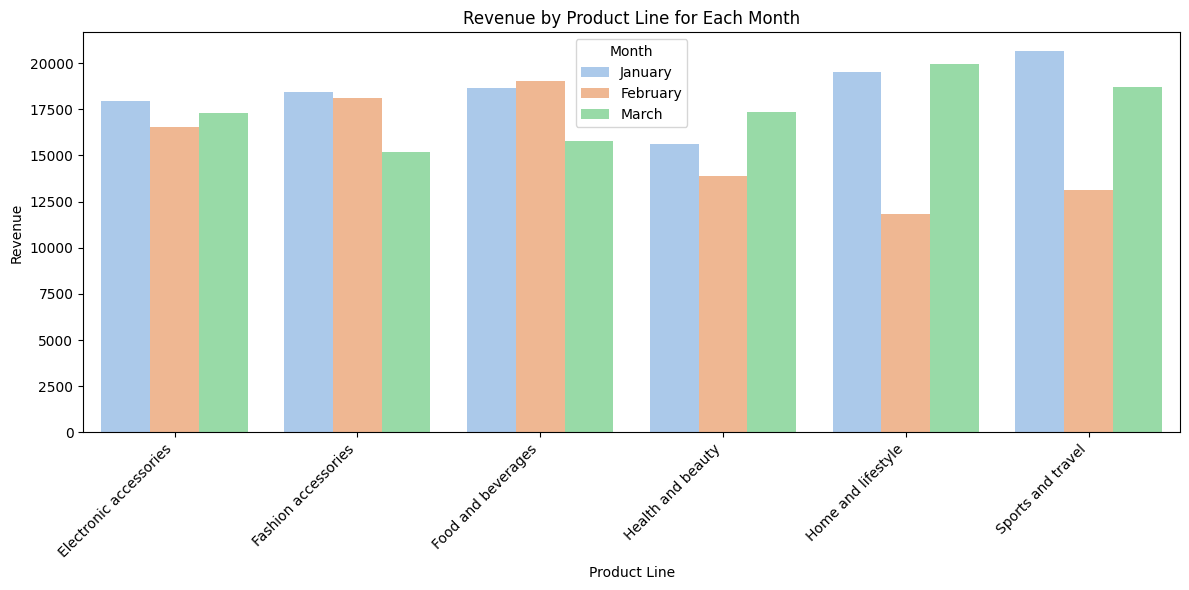

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Revenue'] = df['Unit price'] * df['Quantity']

product_line_month_revenue = df.groupby(['Product line', 'Month']).agg({'Revenue': 'sum'}).reset_index()
month_order = ['January', 'February', 'March']
product_line_month_revenue['Month'] = pd.Categorical(product_line_month_revenue['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(12, 6))

sns.barplot(data=product_line_month_revenue, x='Product line', y='Revenue', hue='Month', palette='pastel')
plt.title('Revenue by Product Line for Each Month')
plt.xlabel('Product Line')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Month')
plt.tight_layout()
plt.show()

**Comparing Sales by Gender for each month**

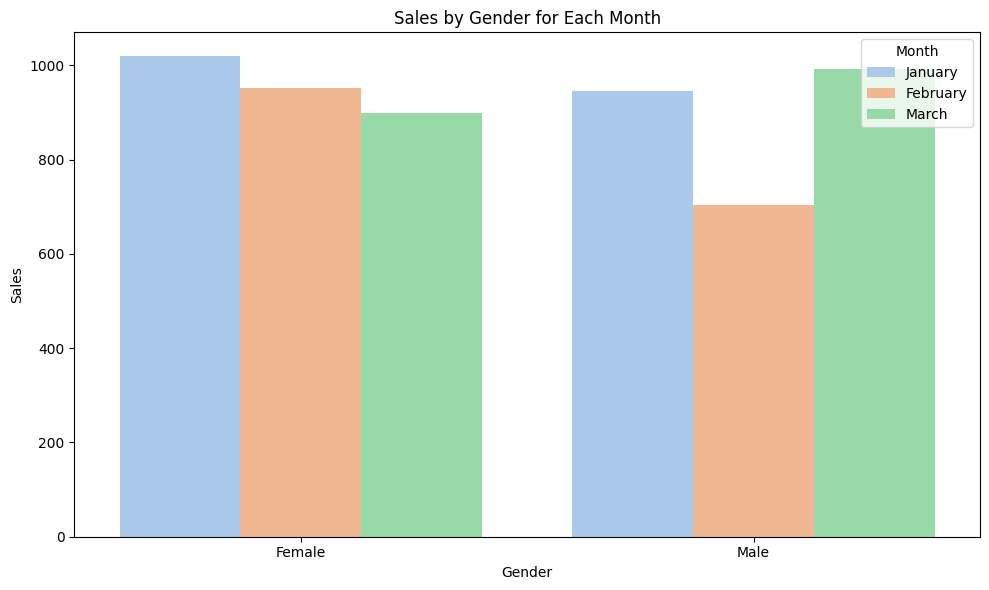

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()

gender_month_sales = df.groupby(['Gender', 'Month']).agg({'Quantity': 'sum'}).reset_index()

month_order = ['January', 'February', 'March']
gender_month_sales['Month'] = pd.Categorical(gender_month_sales['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=gender_month_sales, x='Gender', y='Quantity', hue='Month', palette='pastel')
plt.title('Sales by Gender for Each Month')
plt.xlabel('Gender')
plt.ylabel('Sales')
plt.legend(title='Month')
plt.tight_layout()
plt.show()

**Comparing Revenue by Gender for each month**

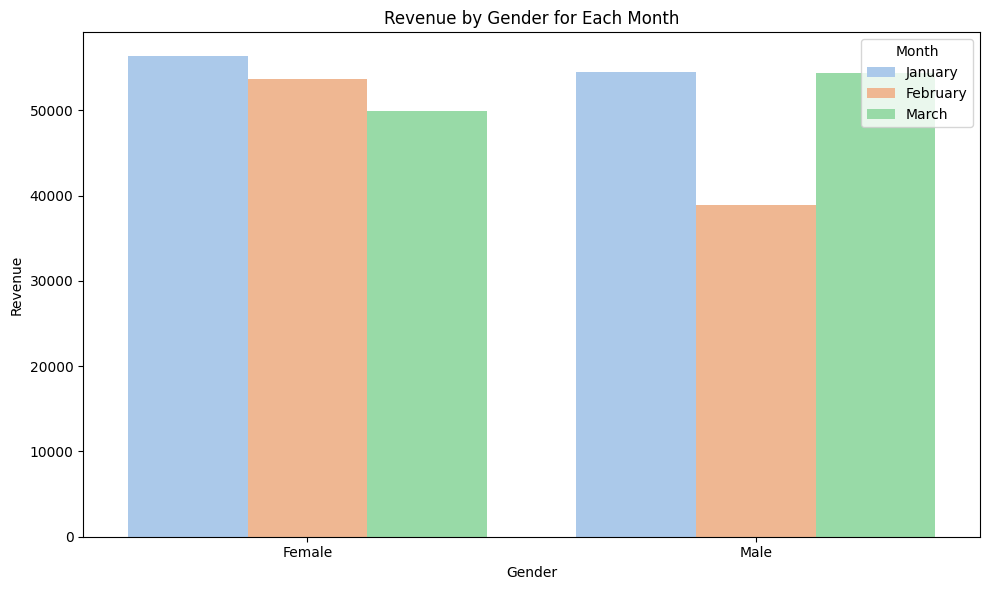

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Revenue'] = df['Unit price'] * df['Quantity']

gender_month_revenue = df.groupby(['Gender', 'Month']).agg({'Revenue': 'sum'}).reset_index()

month_order = ['January', 'February', 'March']
gender_month_revenue['Month'] = pd.Categorical(gender_month_revenue['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=gender_month_revenue, x='Gender', y='Revenue', hue='Month', palette='pastel')
plt.title('Revenue by Gender for Each Month')
plt.xlabel('Gender')
plt.ylabel('Revenue')
plt.legend(title='Month')
plt.tight_layout()
plt.show()

**Sales by Payment method for each month**

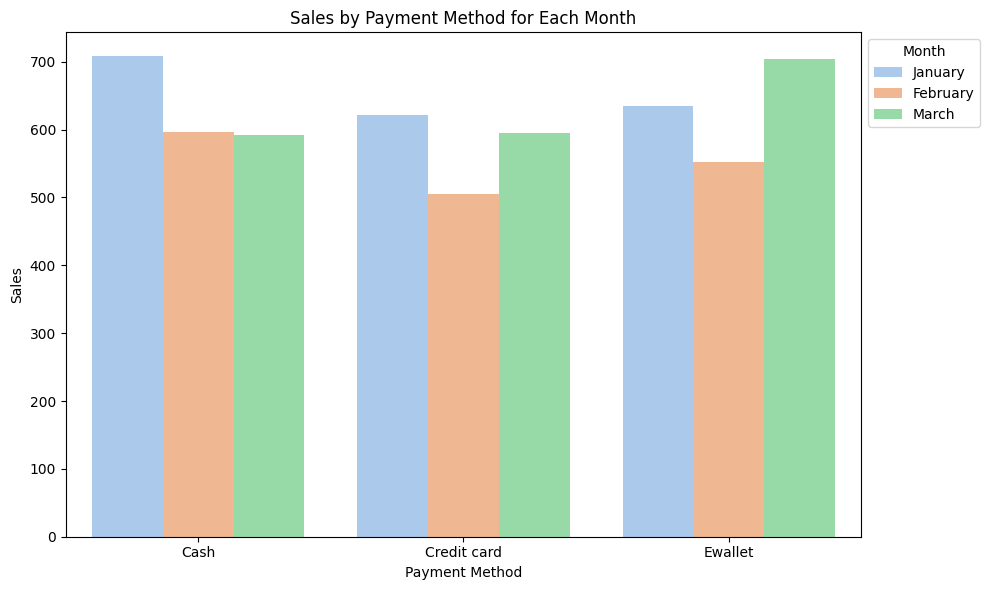

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
payment_month_sales = df.groupby(['Payment', 'Month']).agg({'Quantity': 'sum'}).reset_index()

month_order = ['January', 'February', 'March'] # Reorder
payment_month_sales['Month'] = pd.Categorical(payment_month_sales['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=payment_month_sales, x='Payment', y='Quantity', hue='Month', palette='pastel')
plt.title('Sales by Payment Method for Each Month')
plt.xlabel('Payment Method')
plt.ylabel('Sales')

plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Revenue by Payment method for each month**

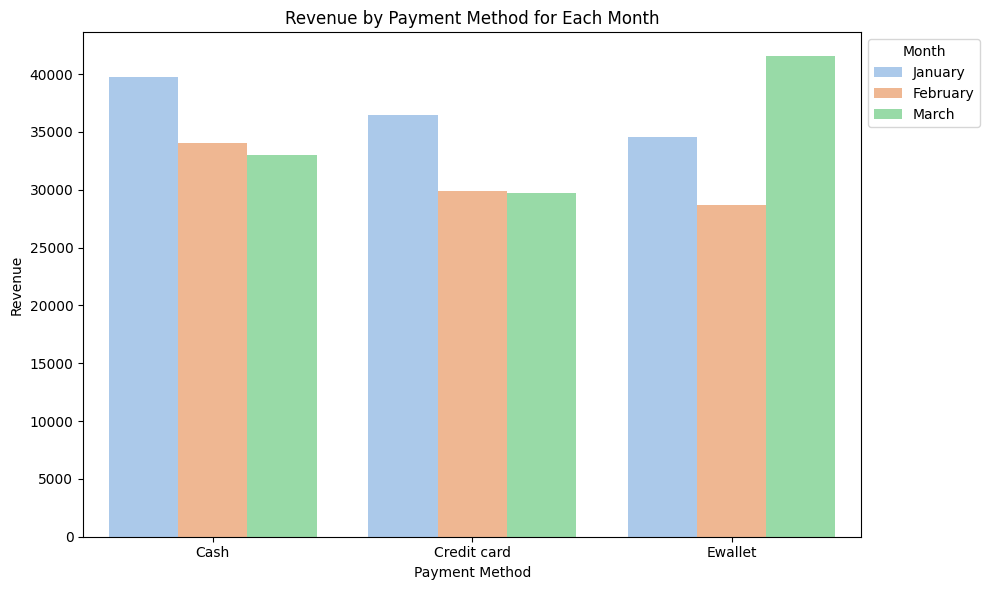

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Revenue'] = df['Unit price'] * df['Quantity']

payment_month_revenue = df.groupby(['Payment', 'Month']).agg({'Revenue': 'sum'}).reset_index()
month_order = ['January', 'February', 'March']
payment_month_revenue['Month'] = pd.Categorical(payment_month_revenue['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=payment_month_revenue, x='Payment', y='Revenue', hue='Month', palette='pastel')
plt.title('Revenue by Payment Method for Each Month')
plt.xlabel('Payment Method')
plt.ylabel('Revenue')
plt.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Sales by Product Line of each Month**

In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
month_order = ['January', 'February', 'March']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

product_line_month_sales = df.groupby(['Product line', 'Month']).agg({'Quantity': 'sum'}).reset_index()
product_line_month_sales = product_line_month_sales.sort_values(by=['Product line', 'Month'])

print("Sales by Product Line for Each Month:")
print(product_line_month_sales)

Sales by Product Line for Each Month:
              Product line     Month  Quantity
0   Electronic accessories   January       333
1   Electronic accessories  February       313
2   Electronic accessories     March       325
3      Fashion accessories   January       336
4      Fashion accessories  February       295
5      Fashion accessories     March       271
6       Food and beverages   January       325
7       Food and beverages  February       349
8       Food and beverages     March       278
9        Health and beauty   January       254
10       Health and beauty  February       266
11       Health and beauty     March       334
12      Home and lifestyle   January       342
13      Home and lifestyle  February       205
14      Home and lifestyle     March       364
15       Sports and travel   January       375
16       Sports and travel  February       226
17       Sports and travel     March       319


**Revenue by Payment method for each month**

In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Revenue'] = df['Unit price'] * df['Quantity']

month_order = ['January', 'February', 'March']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

product_line_month_revenue = df.groupby(['Product line', 'Month']).agg({'Revenue': 'sum'}).reset_index()
product_line_month_revenue = product_line_month_revenue.sort_values(by=['Product line', 'Month'])

print("Revenue by Product Line for Each Month:")
print(product_line_month_revenue)

Revenue by Product Line for Each Month:
              Product line     Month   Revenue
0   Electronic accessories   January  17934.56
1   Electronic accessories  February  16536.10
2   Electronic accessories     March  17279.37
3      Fashion accessories   January  18423.92
4      Fashion accessories  February  18104.63
5      Fashion accessories     March  15191.35
6       Food and beverages   January  18638.60
7       Food and beverages  February  19047.96
8       Food and beverages     March  15784.72
9        Health and beauty   January  15603.02
10       Health and beauty  February  13906.91
11       Health and beauty     March  17341.25
12      Home and lifestyle   January  19518.80
13      Home and lifestyle  February  11842.27
14      Home and lifestyle     March  19935.99
15       Sports and travel   January  20635.26
16       Sports and travel  February  13152.01
17       Sports and travel     March  18710.66


**Sales by gender for each month**

In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
month_order = ['January', 'February', 'March']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

gender_month_sales = df.groupby(['Gender', 'Month']).agg({'Quantity': 'sum'}).reset_index()
gender_month_sales = gender_month_sales.sort_values(by=['Gender', 'Month'])

print("Sales by Gender for Each Month:")
print(gender_month_sales)

Sales by Gender for Each Month:
   Gender     Month  Quantity
0  Female   January      1019
1  Female  February       951
2  Female     March       899
3    Male   January       946
4    Male  February       703
5    Male     March       992


**Revenue by gender for each month**

In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Revenue'] = df['Unit price'] * df['Quantity']

month_order = ['January', 'February', 'March']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

gender_month_revenue = df.groupby(['Gender', 'Month']).agg({'Revenue': 'sum'}).reset_index()
gender_month_revenue = gender_month_revenue.sort_values(by=['Gender', 'Month'])

print("Revenue by Gender for Each Month:")
print(gender_month_revenue)

Revenue by Gender for Each Month:
   Gender     Month   Revenue
0  Female   January  56322.84
1  Female  February  53652.91
2  Female     March  49912.75
3    Male   January  54431.32
4    Male  February  38936.97
5    Male     March  54330.59


**Sales by Payment Method for each month**

In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()

month_order = ['January', 'February', 'March']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

payment_month_sales = df.groupby(['Payment', 'Month']).agg({'Quantity': 'sum'}).reset_index()
payment_month_sales = payment_month_sales.sort_values(by=['Payment', 'Month'])

print("Sales by Payment Method for Each Month:")
print(payment_month_sales)


Sales by Payment Method for Each Month:
       Payment     Month  Quantity
0         Cash   January       708
1         Cash  February       596
2         Cash     March       592
3  Credit card   January       622
4  Credit card  February       505
5  Credit card     March       595
6      Ewallet   January       635
7      Ewallet  February       553
8      Ewallet     March       704


**Revenue by Payment Method for each month**

In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Revenue'] = df['Unit price'] * df['Quantity']

month_order = ['January', 'February', 'March']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

payment_month_revenue = df.groupby(['Payment', 'Month']).agg({'Revenue': 'sum'}).reset_index()
payment_month_revenue = payment_month_revenue.sort_values(by=['Payment', 'Month'])

print("Revenue by Payment Method for Each Month:")
print(payment_month_revenue)


Revenue by Payment Method for Each Month:
       Payment     Month   Revenue
0         Cash   January  39781.03
1         Cash  February  34044.13
2         Cash     March  33038.24
3  Credit card   January  36425.31
4  Credit card  February  29866.69
5  Credit card     March  29676.64
6      Ewallet   January  34547.82
7      Ewallet  February  28679.06
8      Ewallet     March  41528.46


**Month-wise Revenue of each Product Category with Respect to Gender and Payment Method**

In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Revenue'] = df['Unit price'] * df['Quantity']

categories = ['Electronic accessories', 'Fashion accessories', 'Food and beverages',
              'Health and beauty', 'Home and lifestyle', 'Sports and travel']

month_order = ['January', 'February', 'March']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

for category in categories:
    print(f"\nCategory: {category}")

    category_data = df[df['Product line'] == category]
    category_sales_revenue = category_data.groupby(['Gender', 'Payment', 'Month']).agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()

    print(category_sales_revenue)



Category: Electronic accessories
    Gender      Payment     Month  Quantity  Revenue
0   Female         Cash   January        52  2731.86
1   Female         Cash  February       103  5189.16
2   Female         Cash     March        51  2759.66
3   Female  Credit card   January        54  3045.42
4   Female  Credit card  February        39  2542.08
5   Female  Credit card     March        56  3052.90
6   Female      Ewallet   January        43  1576.48
7   Female      Ewallet  February        49  2395.43
8   Female      Ewallet     March        41  2518.46
9     Male         Cash   January        62  3380.29
10    Male         Cash  February        36  1590.25
11    Male         Cash     March        94  4091.62
12    Male  Credit card   January        43  2248.65
13    Male  Credit card  February        48  3145.49
14    Male  Credit card     March        22   658.81
15    Male      Ewallet   January        79  4951.86
16    Male      Ewallet  February        38  1673.69
17    Male  

### **Combinations:**
#### Gender and Payment Methods


*   Female - Cash
* Female - E-Wallet
* Female - Credit card
*   Male - Cash
* Male - E-Wallet
* Male - Credit card






In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Revenue'] = df['Unit price'] * df['Quantity']

month_order = ['January', 'February', 'March']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

gender_payment_month_sales_revenue = df.groupby(['Gender', 'Payment', 'Month']).agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()

gender_payment_month_sales_revenue = gender_payment_month_sales_revenue.sort_values(by=['Gender', 'Payment', 'Month'])

for gender, payment in gender_payment_month_sales_revenue.groupby(['Gender', 'Payment']):
    print(f"\nGender: {gender[0]}, Payment Method: {gender[1]}")
    print(payment)



Gender: Female, Payment Method: Cash
   Gender Payment     Month  Quantity   Revenue
0  Female    Cash   January       395  21477.68
1  Female    Cash  February       376  21293.52
2  Female    Cash     March       233  13909.00

Gender: Female, Payment Method: Credit card
   Gender      Payment     Month  Quantity  Revenue
3  Female  Credit card   January       327  18733.3
4  Female  Credit card  February       280  16088.6
5  Female  Credit card     March       321  16129.0

Gender: Female, Payment Method: Ewallet
   Gender  Payment     Month  Quantity   Revenue
6  Female  Ewallet   January       297  16111.86
7  Female  Ewallet  February       295  16270.79
8  Female  Ewallet     March       345  19874.75

Gender: Male, Payment Method: Cash
   Gender Payment     Month  Quantity   Revenue
9    Male    Cash   January       313  18303.35
10   Male    Cash  February       220  12750.61
11   Male    Cash     March       359  19129.24

Gender: Male, Payment Method: Credit card
   Gender

**Plotting the Combinations to obtain clarity**

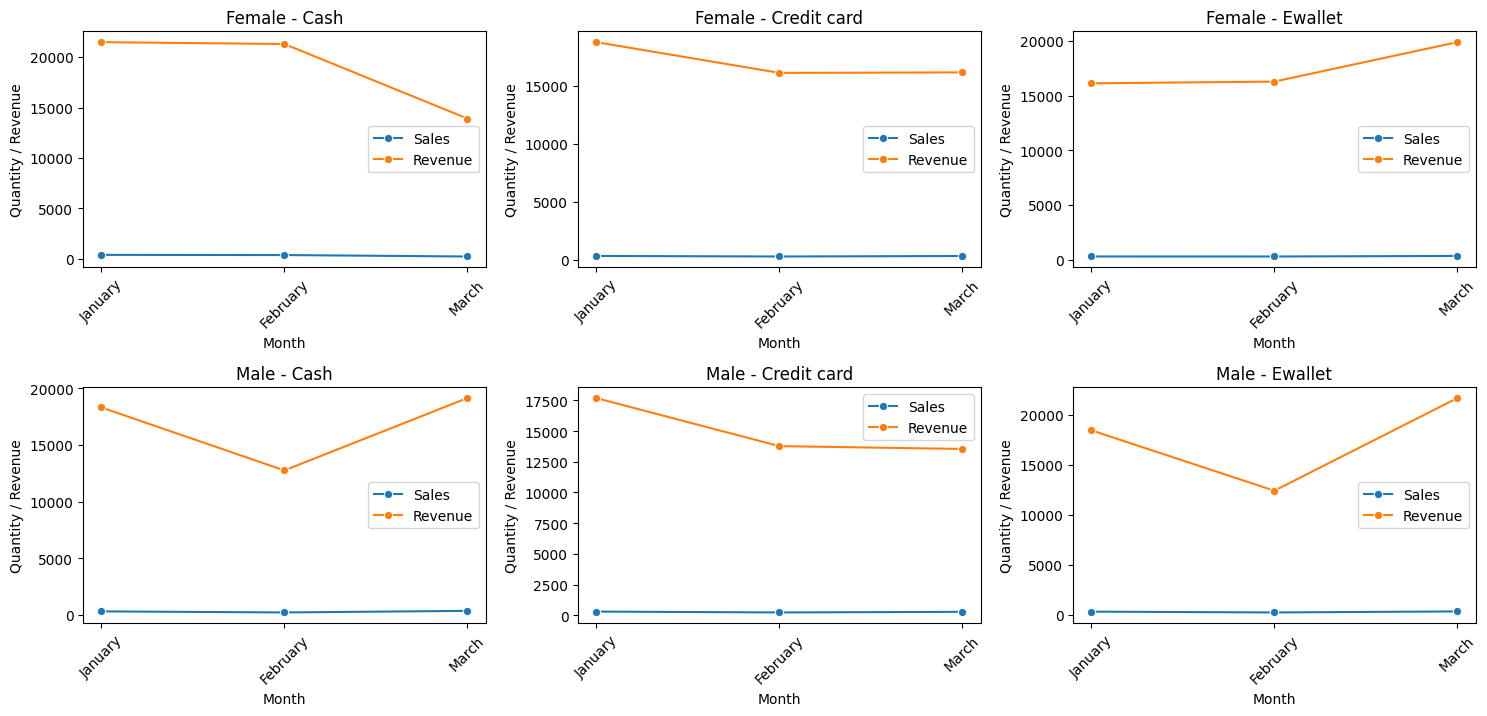

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Revenue'] = df['Unit price'] * df['Quantity']

month_order = ['January', 'February', 'March']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

gender_payment_month_sales_revenue = df.groupby(['Gender', 'Payment', 'Month']).agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()

gender_payment_month_sales_revenue = gender_payment_month_sales_revenue.sort_values(by=['Gender', 'Payment', 'Month'])

plt.figure(figsize=(15, 10))
for i, (gender_payment, data) in enumerate(gender_payment_month_sales_revenue.groupby(['Gender', 'Payment'])):
    plt.subplot(3, 3, i+1)
    sns.lineplot(data=data, x='Month', y='Quantity', marker='o', label='Sales')
    sns.lineplot(data=data, x='Month', y='Revenue', marker='o', label='Revenue')
    plt.title(f"{gender_payment[0]} - {gender_payment[1]}")
    plt.xlabel('Month')
    plt.ylabel('Quantity / Revenue')
    plt.xticks(rotation=45)
    plt.legend()

plt.tight_layout()
plt.show()


**We can observe the following trends:**


* **Female - Cash:** Sales and revenue decreased from January to March.
March had the lowest sales and revenue compared to January and February.


* **Female - Credit card:** Sales and revenue remained relatively stable across the three months.
February had the lowest revenue compared to January and March.

* **Female - Ewallet:**
Sales and revenue increased from January to March.
March had the highest sales and revenue compared to January and February.

* **Male - Cash:**
Sales and revenue decreased from January to February but increased in March.
March had the highest sales and revenue compared to January and February.

* **Male - Credit card:** Sales and revenue decreased from January to February but slightly increased in March.
January had the highest revenue compared to February and March.

* **Male - Ewallet:**
Sales and revenue decreased from January to February but increased in March.
March had the highest revenue compared to January and February.

Based on these trends, it appears that the best combination in terms of consistent performance and revenue growth is **Female with Ewallet**.

This combination showed an increase in sales and revenue over the three months, with March having the highest sales and revenue compared to January and February.

**High-Performing Segments**

In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Revenue'] = df['Unit price'] * df['Quantity']

gender_payment_avg_sales_revenue = df.groupby(['Gender', 'Payment']).agg({'Quantity': 'mean', 'Revenue': 'mean'}).reset_index()

gender_payment_avg_sales_revenue = gender_payment_avg_sales_revenue.sort_values(by='Revenue', ascending=False)

print("High-Performing Segments (Based on Average Revenue):")
print(gender_payment_avg_sales_revenue)


High-Performing Segments (Based on Average Revenue):
   Gender      Payment  Quantity     Revenue
2  Female      Ewallet  5.856250  326.608750
0  Female         Cash  5.640449  318.428090
1  Female  Credit card  5.693252  312.582209
4    Male  Credit card  5.364865  304.173919
3    Male         Cash  5.373494  302.308434
5    Male      Ewallet  5.162162  283.772649


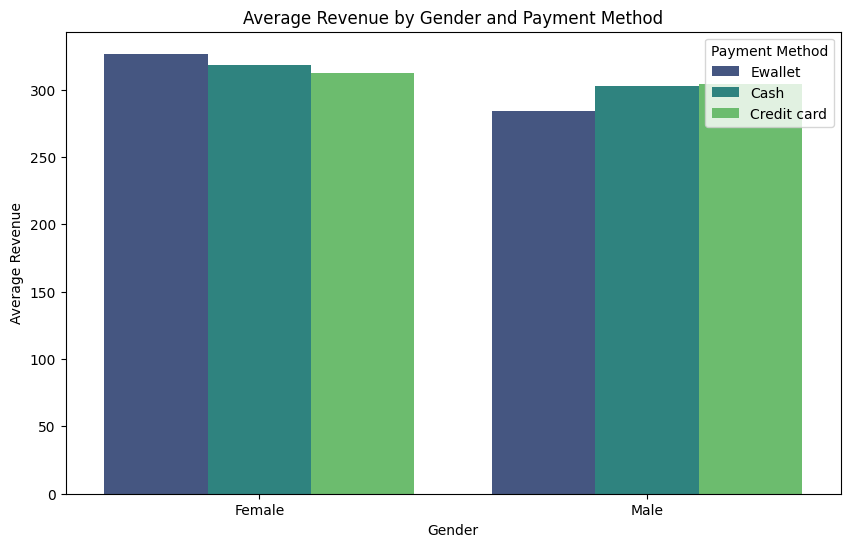

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Revenue'] = df['Unit price'] * df['Quantity']

gender_payment_avg_sales_revenue = df.groupby(['Gender', 'Payment']).agg({'Quantity': 'mean', 'Revenue': 'mean'}).reset_index()
gender_payment_avg_sales_revenue = gender_payment_avg_sales_revenue.sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=gender_payment_avg_sales_revenue, x='Gender', y='Revenue', hue='Payment', palette='viridis')
plt.title('Average Revenue by Gender and Payment Method')
plt.xlabel('Gender')
plt.ylabel('Average Revenue')
plt.legend(title='Payment Method')
plt.show()

From the provided data on high-performing segments based on average revenue, we can observe the following:

* **Gender and Payment Method Combination:** The top-performing segment based on average revenue is ***Female with Ewallet***.

Female customers using Ewallet as their payment method have the highest average revenue compared to other segments.

* **Average Revenue:** Across all high-performing segments, the average revenue ranges from approximately 283 dollar to dollar 326.

Female customers tend to have slightly higher average revenue compared to male customers across all payment methods.

* **Payment Method Influence:**

Ewallet appears to be a preferred payment method for high-spending customers, as both male and female customers using Ewallet have higher average revenue compared to other payment methods.

* **Consistency:**
The average quantity of items sold (Quantity) is relatively consistent across all segments, indicating that the difference in revenue is primarily driven by the average price per item (Revenue).

Based on this information, it seems that targeting promotions or marketing campaigns towards female customers, especially those using Ewallet as their payment method, could potentially lead to higher revenue generation.

Additionally, offering incentives or discounts for Ewallet transactions might encourage more customers to use this payment method, further boosting revenue.

**Address Low-Performing Segments**

In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Revenue'] = df['Unit price'] * df['Quantity']

gender_payment_avg_sales_revenue = df.groupby(['Gender', 'Payment']).agg({'Quantity': 'mean', 'Revenue': 'mean'}).reset_index()
gender_payment_avg_sales_revenue = gender_payment_avg_sales_revenue.sort_values(by='Revenue')

print("Low-Performing Segments (Based on Average Revenue):")
print(gender_payment_avg_sales_revenue)


Low-Performing Segments (Based on Average Revenue):
   Gender      Payment  Quantity     Revenue
5    Male      Ewallet  5.162162  283.772649
3    Male         Cash  5.373494  302.308434
4    Male  Credit card  5.364865  304.173919
1  Female  Credit card  5.693252  312.582209
0  Female         Cash  5.640449  318.428090
2  Female      Ewallet  5.856250  326.608750


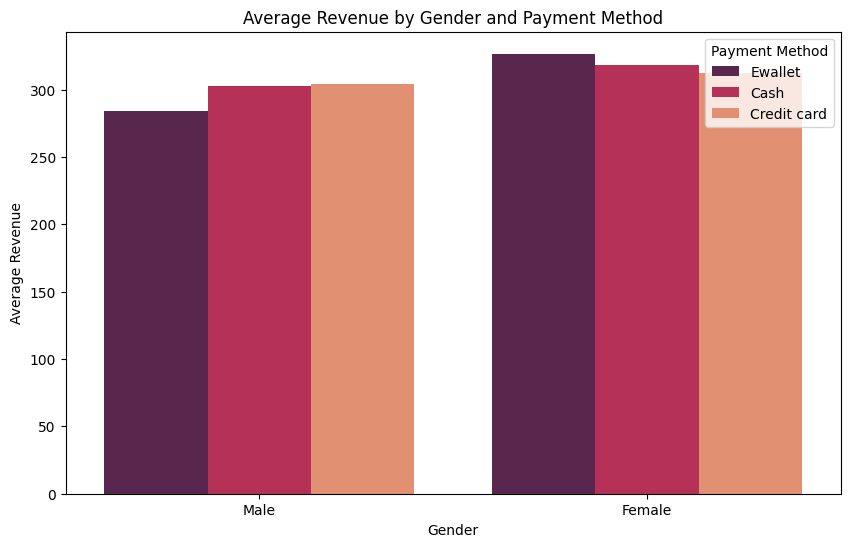

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Revenue'] = df['Unit price'] * df['Quantity']

gender_payment_avg_sales_revenue = df.groupby(['Gender', 'Payment']).agg({'Quantity': 'mean', 'Revenue': 'mean'}).reset_index()

gender_payment_avg_sales_revenue = gender_payment_avg_sales_revenue.sort_values(by='Revenue')

plt.figure(figsize=(10, 6))
sns.barplot(data=gender_payment_avg_sales_revenue, x='Gender', y='Revenue', hue='Payment', palette='rocket')
plt.title('Average Revenue by Gender and Payment Method')
plt.xlabel('Gender')
plt.ylabel('Average Revenue')
plt.legend(title='Payment Method')
plt.show()


From the provided data on low-performing segments based on average revenue, we can observe the following:

* **Gender and Payment Method Combination:**
The top-performing segment based on average revenue is **Female with Ewallet**, followed by **Female with Cash**.

* ***Male customers using Ewallet, Cash, and Credit card are the lowest-performing segments based on average revenue.***

* **Average Revenue:** Across all low-performing segments, the average revenue ranges from approximately dollar 283 to dollar 326.
Female customers tend to have slightly higher average revenue compared to male customers across all payment methods.

* **Payment Method Influence:** Ewallet appears to be a preferred payment method for high-spending customers, as both male and female customers using Ewallet have higher average revenue compared to other payment methods.
Male customers using Ewallet have the lowest average revenue among all segments, indicating potential areas for improvement.

* **Consistency:** The average quantity of items sold (Quantity) is relatively consistent across all segments, indicating that the difference in revenue is primarily driven by the average price per item (Revenue).

**Customer Preferences**

In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Revenue'] = df['Unit price'] * df['Quantity']

customer_preferences = df.groupby(['Gender', 'Payment']).agg({
    'Quantity': 'sum',                                # Total quantity purchased
    'Revenue': 'sum',                                  # Total revenue generated
    'Product line': lambda x: x.mode(),               # Most common product line
    'Unit price': 'mean',                               # Average unit price
}).reset_index()

print("Customer Preferences based on Gender and Payment Method:")
print(customer_preferences)


Customer Preferences based on Gender and Payment Method:
   Gender      Payment  Quantity   Revenue            Product line  Unit price
0  Female         Cash      1004  56680.20  Electronic accessories   56.874944
1  Female  Credit card       928  50950.90     Fashion accessories   52.470368
2  Female      Ewallet       937  52257.40     Fashion accessories   56.317687
3    Male         Cash       892  50183.20  Electronic accessories   56.634639
4    Male  Credit card       794  45017.74       Health and beauty   56.513581
5    Male      Ewallet       955  52497.94      Home and lifestyle   55.240703


From the provided data on customer preferences based on gender and payment method, we can infer the following:

* **Quantity and Revenue:** Female customers tend to have higher total quantity purchased and revenue generated compared to male customers across all payment methods. **Ewallet appears to be the preferred payment method** for both genders, with the highest total quantity purchased and revenue generated.

* **Product Line Preference:** Female customers predominantly purchase products from the "***Electronic accessories***" and "***Fashion accessories***" product lines, regardless of the payment method.

* Male customers show more diversity in their product line preferences, with purchases spread across categories such as "Electronic accessories," "Health and beauty," and "Home and lifestyle."

* **Unit Price:** The average unit price of products purchased is relatively consistent across different gender and payment method combinations, with slight variations observed.


**Ratings**

Less than 5 (Average)

In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")
low_rating_df = df[df['Rating'] < 5]

product_line_units_sold = low_rating_df.groupby('Product line')['Quantity'].sum()

max_units_product_line = product_line_units_sold.idxmax()

max_units_sold = product_line_units_sold.max()

print("Product line with the highest number of units sold with ratings less than 5:")
print(f"{max_units_product_line}: {max_units_sold} units")


Product line with the highest number of units sold with ratings less than 5:
Home and lifestyle: 181 units


**Average Ratings**

In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")

average_ratings = df.groupby('Product line')['Rating'].mean()

print("Average ratings for each product line:")
print(average_ratings)


Average ratings for each product line:
Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


**Timing Preferences**


*   Forenoon (After Morning)
*   Afternoon (Before Evening)



In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")
df['Time'] = df['Time'].astype(str)
df['Time'] = df['Time'].apply(lambda x: '0' + x if len(x) == 7 else x)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['Hour'] = df['Time'].dt.hour

# Day (6:00 to 21:59)
day_shopping_count = df[(df['Hour'] >= 6) & (df['Hour'] <= 21)].groupby('Gender').size()

print("Shopping habits by gender during the day:")
print(day_shopping_count)


Shopping habits by gender during the day:
Gender
Female    501
Male      499
dtype: int64


In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")
df['Time'] = df['Time'].astype(str)

night_start = '22:00:00'
night_end = '05:59:59'

night_shopping = df[(df['Time'] >= night_start) | (df['Time'] <= night_end)]

night_shopping_by_gender = night_shopping.groupby('Gender').size()

print("Shopping habits by gender during the night:")
print(night_shopping_by_gender)


Shopping habits by gender during the night:
Series([], dtype: int64)


In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")

df['Time'] = df['Time'].astype(str)
morning_start = '00:00:00'
morning_end = '11:59:59'
afternoon_start = '12:00:00'
afternoon_end = '23:59:59'

morning_shopping = df[(df['Time'] >= morning_start) & (df['Time'] <= morning_end)]

afternoon_shopping = df[(df['Time'] >= afternoon_start) & (df['Time'] <= afternoon_end)]

morning_shopping_by_gender = morning_shopping.groupby('Gender').size()

afternoon_shopping_by_gender = afternoon_shopping.groupby('Gender').size()

print("Shopping habits by gender during the morning:")
print(morning_shopping_by_gender)

print("\nShopping habits by gender during the afternoon:")
print(afternoon_shopping_by_gender)


Shopping habits by gender during the morning:
Gender
Female    109
Male       82
dtype: int64

Shopping habits by gender during the afternoon:
Gender
Female    392
Male      417
dtype: int64


**Significantly high shoppings after noon : Especially in women**

**City - Productline**

Highest number of product ordered and from which city

In [ ]:
import pandas as pd
df = pd.read_excel("walmart_sales.xlsx")
city_product_orders = df.groupby(['City', 'Product line']).size().reset_index(name='Order Count')
max_orders_per_city = city_product_orders.groupby('City')['Order Count'].max()
most_ordered_product_per_city = city_product_orders.merge(max_orders_per_city, on=['City', 'Order Count'])

print(most_ordered_product_per_city)


        City         Product line  Order Count
0   Mandalay  Fashion accessories           62
1   Mandalay    Sports and travel           62
2  Naypyitaw   Food and beverages           66
3     Yangon   Home and lifestyle           65


In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")
electronics_orders = df[df['Product line'] == 'Electronic accessories']
city_electronics_orders = electronics_orders.groupby('City').size().reset_index(name='Electronic Orders')

print(city_electronics_orders)


        City  Electronic Orders
0   Mandalay                 55
1  Naypyitaw                 55
2     Yangon                 60


**Max Ordered productline**

In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")
product_orders = df.groupby('Product line').size()
max_orders_product_line = product_orders.idxmax()

print("Product line with maximum number of orders:", max_orders_product_line)


Product line with maximum number of orders: Fashion accessories


In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")
df['Revenue'] = df['Quantity'] * df['Unit price']
product_revenue = df.groupby('Product line')['Revenue'].sum()
highest_revenue_product_line = product_revenue.idxmax()

print("Product line with highest revenue:", highest_revenue_product_line)


Product line with highest revenue: Food and beverages


In [ ]:
import pandas as pd

df = pd.read_excel("walmart_sales.xlsx")
product_sales = df.groupby('Product line')['Quantity'].sum()
highest_sales_product_line = product_sales.idxmax()
print("Product line with highest sales:", highest_sales_product_line)


Product line with highest sales: Electronic accessories


**Shocking!**

*Product line with highest sales is **Electronic Accessories** but it not the most ordered from any of the cities.*